In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

#plt.rc('font', family='NanumGothicCoding')
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False
import networkx as nx
from pyvis.network import Network

In [14]:
import matplotlib.font_manager

font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None,
                                                    fontext='ttf')
[
    matplotlib.font_manager.FontProperties(fname=font).get_name()
    for font in font_list if 'Nanum' in font
]

font_path = Path('../fonts/NanumGothic/NanumGothic.ttf')
fontprop = fm.FontProperties(fname=font_path, size=10)

['NanumGothic Eco',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumBarunpen',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumSquare_ac',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumSquare_ac',
 'NanumGothic',
 'Nanum Pen Script',
 'NanumGothic',
 'NanumBarunpen',
 'Nanum Brush Script',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumGothicCoding',
 'NanumSquare',
 'NanumBarunGothic YetHangul',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumMyeongjo YetHangul',
 'NanumGothic Eco',
 'NanumSquare_ac',
 'NanumBarunGothic',
 'NanumSquare_ac']

{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
224     202209  일     0       종로구        중구  F   0   EE          198   28.13
225     202209  일     0       종로구        중구  F  10   EE           22    5.98
226     202209  일     0       종로구        중구  F  15   EH           97   15.78
227     202209  일     0       종로구        중구  F  15   EE           48   22.29
228     202209  일     0       종로구        중구  F  15   HE           45    3.96
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
792718  202209  토     0       강동구       송파구  M  70   EW           41   13.91
792719  202209  토     0       강

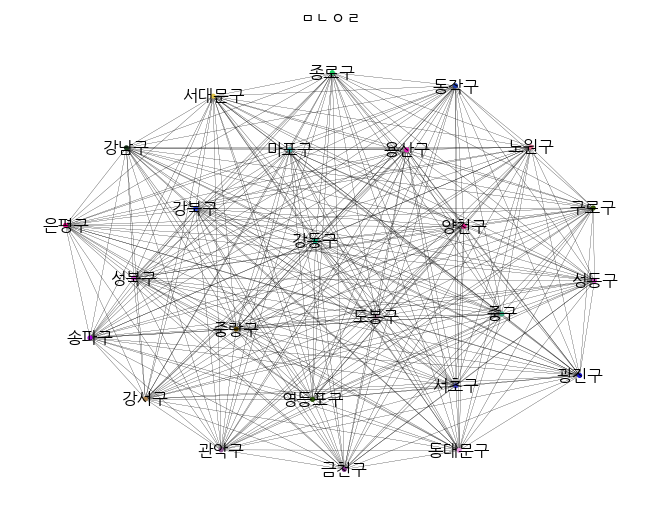

In [28]:
import random

with open("../datasets/한국행정구역분류_행정동코드(서울).csv",
          encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류','읍면동']]
newdata

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
#data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

# tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}
#tst = {11010:"ㅁㄴㅇㄹ"}
print(tst)

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data)


print(data['이동인구(합)'].size)

graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

#for node in graph:

an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")
nx.draw(graph,
        with_labels=True,
        node_color=color,
        node_size=7,
        arrows=False,
        width=0.1,
        font_family='NanumGothic',
        pos=nx.spring_layout(graph))

plt.title("ㅁㄴㅇㄹ")
plt.axis('off')
plt.show()

'''
nt = Network(height='1080px', width='80%',)


nt.from_nx(graph)
nt.toggle_physics(False)
nt.show_buttons(filter_=['physics'])
nt.show('../results/res1.html')
'''

In [23]:
import random

with open("../datasets/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata


from os import listdir

# mport matplotlib.animation as ani

onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]
# print(sorted(onlyfiles))


def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(
        df1[:i].index,
        df1[:i].values)  #note it only returns the dataset, up to the point i


for filename in sorted(onlyfiles):
    with open("../large-datasets/생활이동_자치구_202209/"+filename, encoding='cp949') as f:
        # print(filename)
        data = pd.read_csv(f)
        # print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(10) )
    # l.append(data)
    #data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
    data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
    data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

    # tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
    tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}
    # print(tst)

    data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
    data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
    data = data.replace(tst)

    # print(data)

    # print(data['이동인구(합)'].size)

    graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())
    nx.draw(graph,
            with_labels=True,
            node_color=color,
            node_size=7,
            arrows=False,
            width=0.1,
            font_family='NanumGothic',
            pos=nx.spring_layout(graph))

    plt.title(filename)
    plt.axis('off')
    plt.savefig("../results/forgif/" + filename + ".png", dpi=96)
    plt.close()

# animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
# plt.show()

# animator.save(r'../results/myfirstAnimation.gif')

#for node in graph:

an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
#edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")


229       중구
375      용산구
469      성동구
556      광진구
640     동대문구
762      중랑구
835      성북구
991      강북구
1081     도봉구
1157     노원구
1241     은평구
1352    서대문구
1478     마포구
1574     양천구
1626     강서구
1700     구로구
1757     금천구
1800    영등포구
1884     동작구
1957     관악구
2027     서초구
2108     강남구
2199     송파구
2270     강동구
4484     종로구
Name: 도착 시군구 코드, dtype: object
['#18E82F', '#E039E6', '#03FBF0', '#64D464', '#3DE952', '#3A5CEB', '#ADAFBF', '#501F8C', '#729F6A', '#685A9E', '#559A77', '#387DB1', '#F462E2', '#07D92F', '#552C9B', '#8EC3E7', '#4CA9F6', '#05BA09', '#3789C6', '#CD6034', '#6B0B32', '#3828C6', '#448EB2', '#6A81FE', '#48BA14']


In [27]:
# Build GIF
import imageio.v2 as imageio
print('creating gif\n')
from os import listdir

filenames = ["../results/forgif/"+f for f in listdir("../results/forgif/")]
print(filenames)
with imageio.get_writer('../results/forgif/result.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('gif complete\n')

creating gif

['../results/forgif/생활이동_자치구_2022.09_19시.csv.png', '../results/forgif/생활이동_자치구_2022.09_17시.csv.png', '../results/forgif/생활이동_자치구_2022.09_16시.csv.png', '../results/forgif/생활이동_자치구_2022.09_02시.csv.png', '../results/forgif/생활이동_자치구_2022.09_05시.csv.png', '../results/forgif/생활이동_자치구_2022.09_09시.csv.png', '../results/forgif/생활이동_자치구_2022.09_18시.csv.png', '../results/forgif/생활이동_자치구_2022.09_01시.csv.png', '../results/forgif/result.gif', '../results/forgif/생활이동_자치구_2022.09_04시.csv.png', '../results/forgif/생활이동_자치구_2022.09_00시.csv.png', '../results/forgif/생활이동_자치구_2022.09_11시.csv.png', '../results/forgif/생활이동_자치구_2022.09_21시.csv.png', '../results/forgif/생활이동_자치구_2022.09_20시.csv.png', '../results/forgif/생활이동_자치구_2022.09_07시.csv.png', '../results/forgif/생활이동_자치구_2022.09_03시.csv.png', '../results/forgif/생활이동_자치구_2022.09_15시.csv.png', '../results/forgif/생활이동_자치구_2022.09_22시.csv.png', '../results/forgif/생활이동_자치구_2022.09_08시.csv.png', '../results/forgif/생활이동_자치구_2022.09_23시.csv.png', '..

In [ ]:
'''
def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(
        df1[:i].index,
        df1[:i].values)  #note it only returns the dataset, up to the point i
    for i in range(0, 4):
        p[i].set_color(color[i])  #set the colour of each curve


import matplotlib.animation as ani

animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
plt.show()

animator.save(r'../results/myfirstAnimation.gif')



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)


def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,


# anim = FuncAnimation(fig, animate, frames=200, interval=50)
anim = FuncAnimation(fig, animate, frames=200, interval=100)

plt.show()
견본 

시간별 애니메이션 할수도??
'''